In [1]:
import os
os.chdir("..")

import seaborn as sns

from sim import League, run_monte_carlo, quick_season, params

## Basics

In a moment, we're going to be chasing fairly small effect sizes, which will require monte carlo methods - 
simulating hundreds of seasons and averaging them out. During this process we lose access to individual season
data, so let's spend a bit of time looking into a single season to understand some basics.

This game is run with default parameters, listed below. The critical one right now is "MATCHMAKING_SPREAD":
given an ordered list of all teams, this term represents how many positions teams are allowed to matchmake with.

MMOLB's matchmaking spread is 6.

In [10]:
for a in dir(params):
    if a[0] != "_":
        print(f"{a}: {getattr(params, a)}")

AVERAGE_HITRATE: 0.2
GAME_COUNT: 100
ITERATIONS: 10000
LEAGUE_SIZE: 100
MATCHMAKING_SPREAD: 6
STAT_WEIGHTS: [0.6, 0.3, 0.1, 0.0]
WEIGHT_WEIGHT: 0.7


Let's examine a single season for a moment. In a bit, we'll go into full monte carlo runs and lose access to a lot of the individual player data. This will make up the basics for all data going forward.
For reference, here's a player chart:


,team,scale,weight,attr_0,attr_1,attr_2,attr_3,at_bats,hits,average,is_pitcher
0,1,0.5,0.669333,0.819449,0.288501,0.911133,0.875809,661,121,0.183056,True
1,1,0.5,0.604247,0.446989,0.921829,0.595052,0.751380,671,131,0.195231,True
2,1,0.5,0.334518,0.212947,0.546982,0.426547,0.923404,714,174,0.243697,True
3,1,0.5,0.753036,0.827872,0.623648,0.692189,0.629496,642,102,0.158879,True
4,1,0.5,0.687215,0.646199,0.794812,0.610519,0.669566,642,102,0.158879,True
...,...,...,...,...,...,...,...,...,...,...,...
1495,100,0.5,0.293212,0.257544,0.423008,0.117830,0.466947,331,77,0.232628,False
1496,100,0.5,0.303117,0.145428,0.404517,0.945047,0.022382,325,60,0.184615,False
1497,100,0.5,0.513824,0.455653,0.781726,0.059142,0.982955,317,61,0.192429,False
1498,100,0.5,0.677642,0.921763,0.309711,0.316713,0.163963,312,55,0.176282,False


Correlation for weight: 0.833
Correlation for attr_0: 0.729
Correlation for attr_1: 0.337
Correlation for attr_2: 0.150
Correlation for attr_3: 0.002


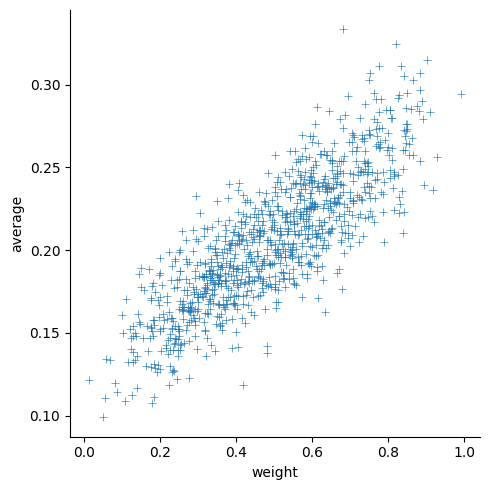

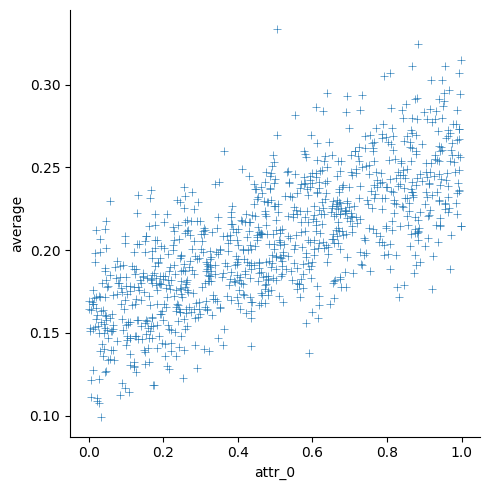

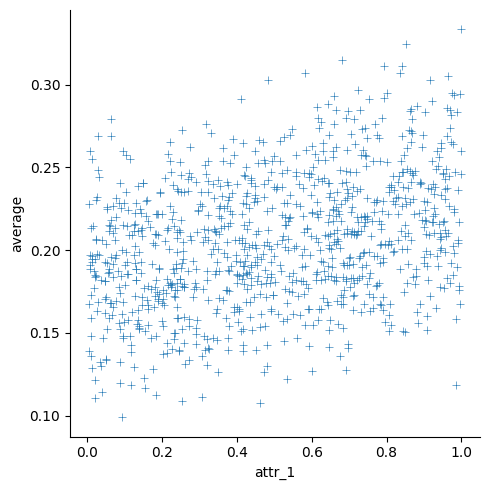

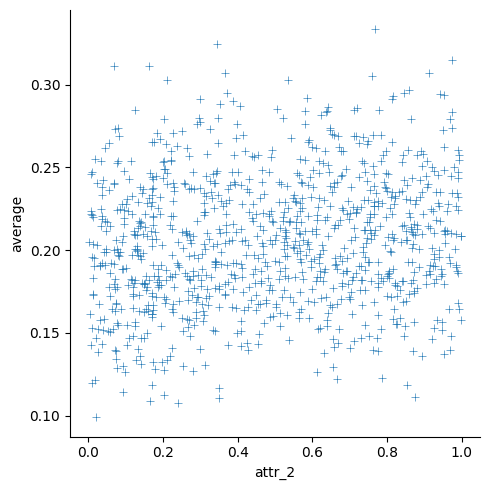

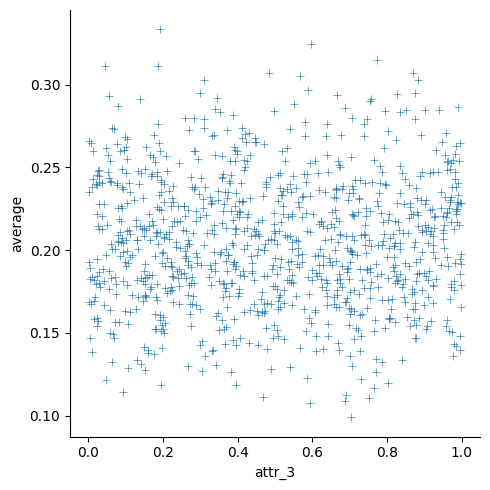

In [6]:




params.MATCHMAKING_SPREAD = 6
team_df, player_df = quick_season()
print("For reference, here's a player chart:")
display(player_df)


In [ ]:

batters = player_df.loc[player_df["is_pitcher"] == False]

for attr in ["weight"] + [f"attr_{i}" for i in range(4)]:
    p = sns.relplot(data=batters, x=attr, y="average", s=30, marker="+")
    print(f"Correlation for {attr}: {batters[[attr, 'average']].corr().iat[0, 1]:.3f}")
